In [2]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from scipy.stats import gaussian_kde
import ast


dataset=pd.read_csv('../Data/all_combined.csv')
# import dataset in format
# Subject, chooce ,receivor, Wait2.RT, targettxt ,gender ,age ,As ,Ao
# subID,list, list ,list ,list, bool ,float ,float ,float


# Load the .npz file
data=[np.load(f'../MCMC_tests/multi_mcmc_sub_{i}.npz') for i in range(len(dataset))]


sub_to_index={}
for index in range( len(dataset)):
    sub=dataset['Subject'][index]
    sub_to_index[sub]=index

In [3]:
def add_data(d1,d2):
    return np.concatenate((d1, d2))

def prosent(data):
    return data/np.sum(data)

In [5]:
print(f'Result shape for data  is ({len(data)},{len(data[0]["arr_0"])})')

Result shape for data  is (139,16000)


In [6]:
# Count all the best preforming u's
result_counted = [[np.count_nonzero(data[i][a]== j) for j in range(6)] for i in range(len(data))]

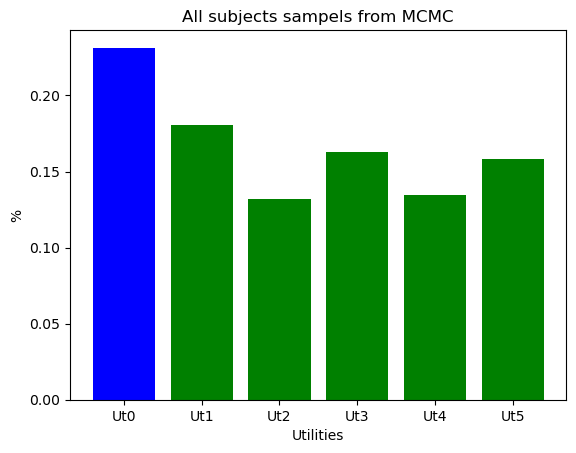

In [7]:

result_counted_sum = [sum(i) for i in zip(*result_counted)]
result_counted_sum_percentage = [result_counted_sum[i]/sum(result_counted_sum)*100 for i in range(len(result_counted_sum))]

us = ['Ut0', 'Ut1', 'Ut2', 'Ut3', 'Ut4', 'Ut5']
counts = result_counted_sum_percentage
counts=prosent(counts)
# Plot the bar chart
plt.bar(us, counts, color = ['blue', 'green', 'green', 'green', 'green', 'green'])
# Set the title and axis labels
plt.title('All subjects sampels from MCMC')
plt.xlabel('Utilities')
plt.ylabel('%')
# Display the plot
plt.show()

In [8]:
result_counted_sum_percentage

[23.139028776978417,
 18.080170863309352,
 13.20521582733813,
 16.286735611510792,
 13.474955035971222,
 15.813893884892085]

In [9]:
# save the y_labels
y_train = np.zeros(len(result_counted))
for person in range(len(result_counted)):
    counts = result_counted[person]
    y_train[person] = np.argmax(counts)


len(y_train)

139

In [10]:
np.save('../MCMC_tests/y_train_v2.npy', y_train)

In [11]:

result_list = np.bincount(y_train.astype(int), minlength=5)

print(result_list)

[46 30  9 35 12  7]


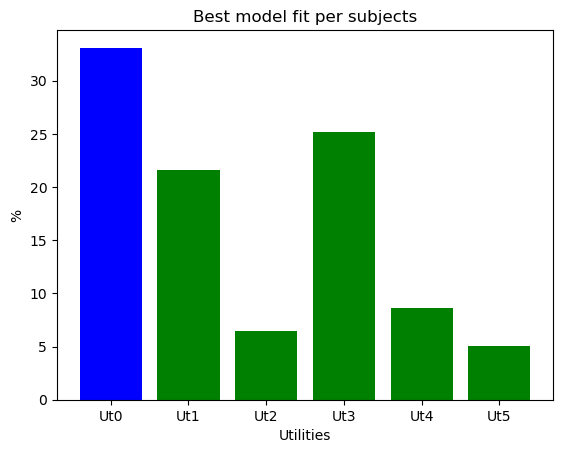

In [13]:
us =['Ut0', 'Ut1', 'Ut2', 'Ut3', 'Ut4', 'Ut5']
counts = result_list
counts=prosent(counts)*100
# Plot the bar chart
plt.bar(us, counts, color = ['blue', 'green', 'green', 'green', 'green', 'green'])
# Set the title and axis labels
plt.title('Best model fit per subjects')
plt.xlabel('Utilities')
plt.ylabel('%')
# Display the plot
plt.show()

In [14]:
#divide into age group
d=[]
d1=[]
d2=[]
d3=[]
d4=[]
a1=[]
a2=[]
a3=[]
a4=[]
for i,(j,k) in enumerate(zip(result_counted,y_train)):
    d=add_data(d,j)
    age=dataset['age'][i]
    if age < 8:
        d1=add_data(d1,j)
        a1.append(k)
    elif age < 10:
        d2=add_data(d2,j)
        a2.append(k)
    elif age < 12:
        d3=add_data(d3,j)
        a3.append(k)
    else:
        d4=add_data(d4,j)
        a4.append(k)

a1=np.bincount(np.array(a1).astype(int), minlength=6)
a2=np.bincount(np.array(a2).astype(int), minlength=6)
a3=np.bincount(np.array(a3).astype(int), minlength=6)
a4=np.bincount(np.array(a4).astype(int), minlength=6)


a1=a1/sum(a1)
a2=a2/sum(a2)
a3=a3/sum(a3)
a4=a4/sum(a4)


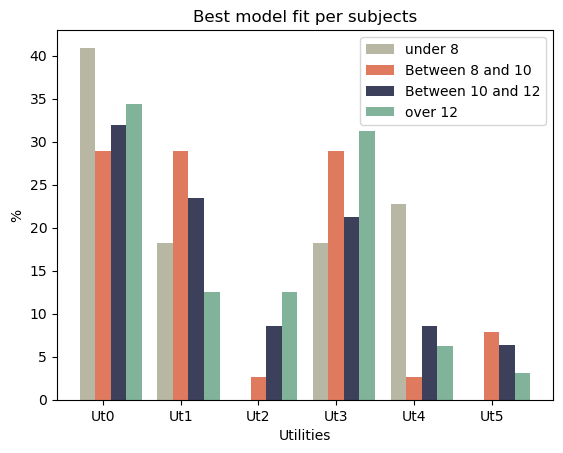

In [17]:

us =['Ut0', 'Ut1', 'Ut2', 'Ut3', 'Ut4', 'Ut5']


# Set the width of each bar
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(us))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
# Plot the bar chart
# Plot the bars
plt.bar(r1, a1*100, color='#B7B7A4', width=bar_width, label='under 8')
plt.bar(r2, a2*100, color='#E07A5F', width=bar_width, label='Between 8 and 10')
plt.bar(r3, a3*100, color='#3D405B', width=bar_width, label='Between 10 and 12')
plt.bar(r4, a4*100, color='#81B29A', width=bar_width, label='over 12')

# Set the title and axis labels
plt.title('Best model fit per subjects')
plt.xlabel('Utilities')
plt.ylabel('%')

# Set the x-axis tick labels
plt.xticks([r + bar_width for r in range(len(us))], us)

# Create a legend
plt.legend()

# Display the plot
plt.show()

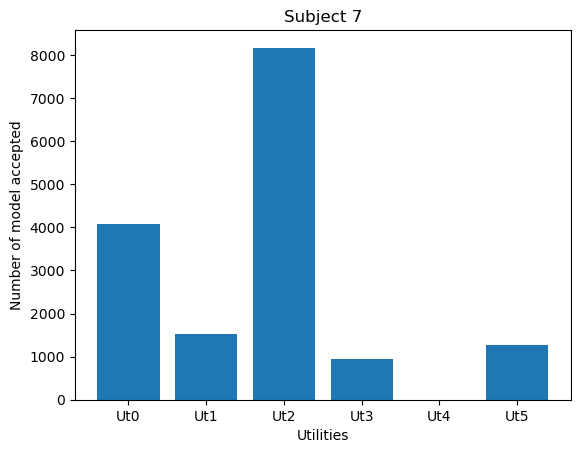

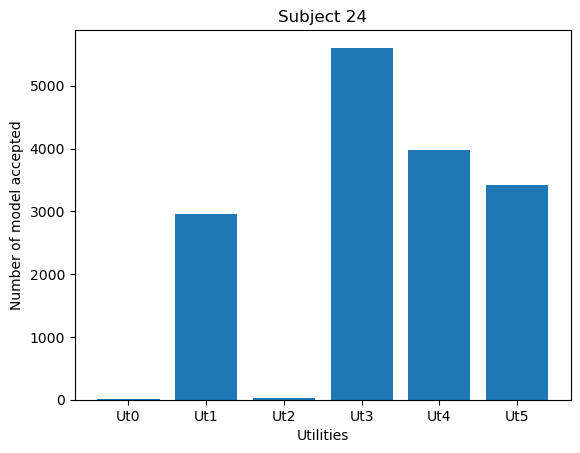

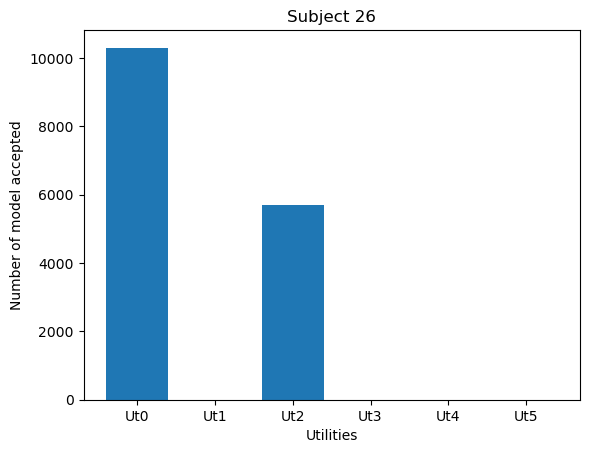

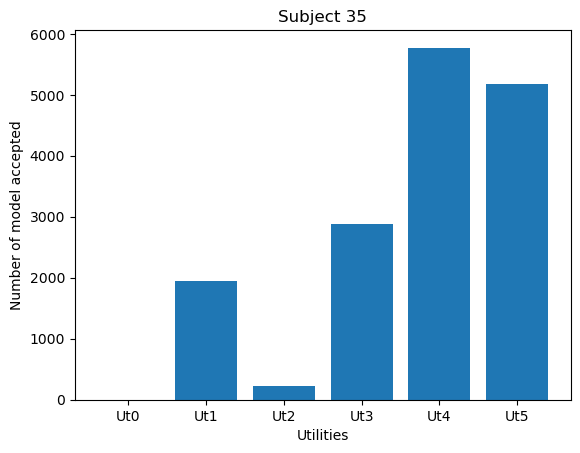

In [18]:

#plots for subjects in the list 'persons'
persons=[sub_to_index[7],sub_to_index[24],sub_to_index[26],sub_to_index[35]]

# for plot all subjects uncomment below
#persons=range(len(result_counted))


for person in persons:
    us = ['Ut0', 'Ut1', 'Ut2', 'Ut3', 'Ut4', 'Ut5']
    counts = result_counted[person]

    # Plot the bar chart
    plt.bar(us, counts)

    # Set the title and axis labels
    plt.title(f'Subject {dataset["Subject"][person]}')
    plt.xlabel('Utilities')
    plt.ylabel('Number of model accepted')

    # Display the plot
    plt.show()


In [20]:
#  Bf = p(D|h1)/p(D|h0)
listtt=[result_list,a1,a2,a3,a4]
tilte=['all','under 8' ,'bettwen 8 and 10','bettwen 10 and 12','over 12']
for res,t in zip(listtt,tilte):
    print(f'hypo {7}')
    print(res[0]/(np.mean(res)))

hypo 7
1.9856115107913668
hypo 7
2.454545454545455
hypo 7
1.736842105263158
hypo 7
1.9148936170212767
hypo 7
2.0625


In [22]:
# find best u for subjects in 'persons'
persons=[sub_to_index[7],sub_to_index[24],sub_to_index[26],sub_to_index[35]]


# to test all subjects uncomment below
# persons=range(len(result_counted))
for person in persons:
    us = ['Ut0', 'Ut1', 'Ut2', 'Ut3', 'Ut4', 'Ut5']
    counts = result_counted[person]
    best=np.argmax(counts)
    print(f'Best u {us[best]}')
    bf = counts[best]/counts[0] if counts[0] > 0 else 'inf'
    print(bf)


Best u Ut2
1.9985319305113776
Best u Ut3
400.42857142857144
Best u Ut0
1.0
Best u Ut4
inf
